<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 4: Multigrid</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>

## Ecuaciones elípticas lineales

Problema de Poisson en el intervalo $(0,1)$:
\begin{equation}
-u''(x) = f(x),\quad \mbox{ en }(0,1), \qquad u(0) = u(1) = 0. 
\end{equation}

Método de diferencias finitas centradas sobre una malla uniforme sobre $[0,1]$: 
\begin{equation}
\text{puntos de grilla } \{x_j\},\,0\leq j\leq n,\quad x_j = j h, \quad h = 1/n.
\end{equation} 
Encontrar $u_j$, $1\leq j \leq n-1$, y con $u_0=u_n=0$, solución de
\begin{equation}
-\left(\frac{u_{j-1}-2u_j+u_{j+1}}{h^{2}}\right) = f_j, \qquad 1\leq j \leq n-1.
\end{equation}
donde $f_{j} =  f(x_j)$. Reescribimos como un sistema lineal para $A\in \mathbb R^{(n-1)\times(n-1)}$
\begin{equation}
A^{h} \mathbf{u} = \mathbf{f},\quad 
\mathbf{u} = \begin{bmatrix} u_1 \\ \vdots \\ u_{n-1} \end{bmatrix},\quad
\mathbf{f} = \begin{bmatrix} f_1 \\ \vdots \\ f_{n-1} \end{bmatrix}
\end{equation}

In [23]:
import numpy as np
import matplotlib.pyplot as plt

0.025
0.0125


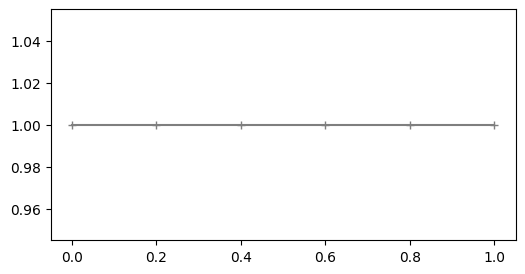

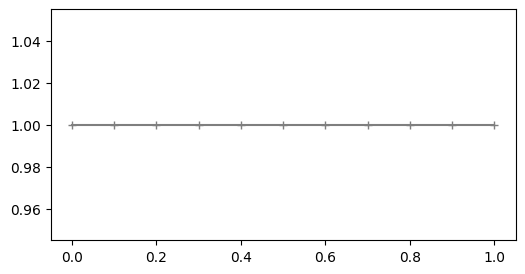

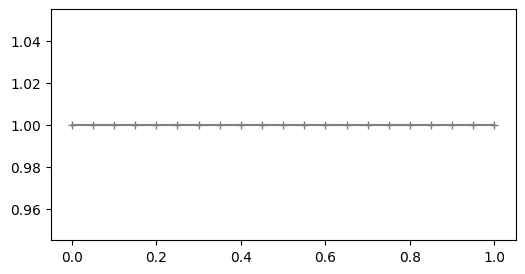

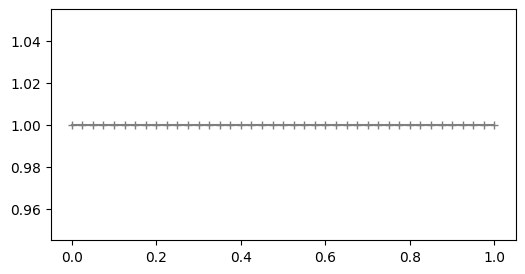

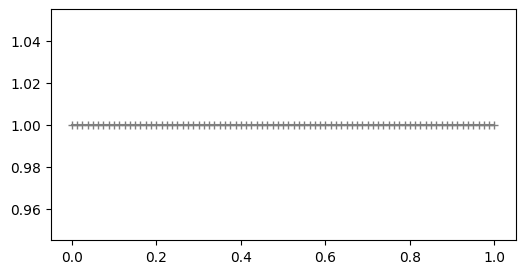

In [206]:
class mesh1d:
    def __init__(self, a = 0.0, b=1.0):
        self.a = a
        self.b = b
    def generate_uniform(self, n=1):
        self.h = (self.b-self.a)/n
        self.x = np.zeros(n+1, dtype=np.float64)
        for j in range(n+1):
            self.x[j] = self.a+j*self.h
    def refine(self):
        xold = self.x
        midpoint = np.zeros(xold.size-1, dtype=np.float64)
        xnew = np.zeros(2*xold.size-1, dtype=np.float64)
        for j in range(xold.size-1):
            midpoint[j] = 0.5*(xold[j+1]+xold[j])
            xnew[2*j] = xold[j]
            xnew[2*j+1] = midpoint[j]
        xnew[-1] = xold[-1]
        self.x = xnew
        self.h = self.h*0.5
    def plot(self):
        fig,ax = plt.subplots(1,1,figsize=(6,3))
        ax.plot(self.x, np.ones(self.x.size), '+-', color='C07')

def diff1dPoissonmatrix(a=0, b=1, n=5):
    deltax = (b-a)/n
    print(deltax)
    A = 2.0/(deltax**2)*np.eye(n-1) -1.0/(deltax**2)*np.diag(np.ones(n-2),-1) - 1.0/(deltax**2)*np.diag(np.ones(n-2),1)
    return A

# Problema de Poisson: -u'' = f 
ufun1D = lambda x: np.sin(3*np.pi*x)
f = lambda x: (3*np.pi)**2*np.sin(3*np.pi*x)

# ufun1D = lambda x: np.sin(4*np.pi*x)
# f = lambda x: (4*np.pi)**2*np.sin(4*np.pi*x)
# ufun1D = lambda x: x**2*(1-x)**2
# f      = lambda x: -2*(6*x**2-6*x+1)
# Grilla de diferencias finitas
n0 = 5
mesh = mesh1d(a=0.0, b=1.0)
mesh.generate_uniform(n=n0)
mesh.plot()


mesh.refine()
mesh.plot()

mesh.refine()
mesh.plot()

mesh.refine()
mesh.plot()
# Matriz de diferencias finitas
A2h = diff1dPoissonmatrix(n=mesh.x.size-1)
mesh.refine()
mesh.plot()


X = mesh.x

# Matriz de diferencias finitas
A1d = diff1dPoissonmatrix(n=mesh.x.size-1)
# vector de diferencias finitas
b1d = np.asarray([f(X[j]) for j in range(1,X.size-1) ])

# Resolvermos el sistema lineal
u = np.zeros(mesh.x.size, dtype=np.float64)
u[1:(X.size-1)] = np.linalg.solve(A1d, b1d)

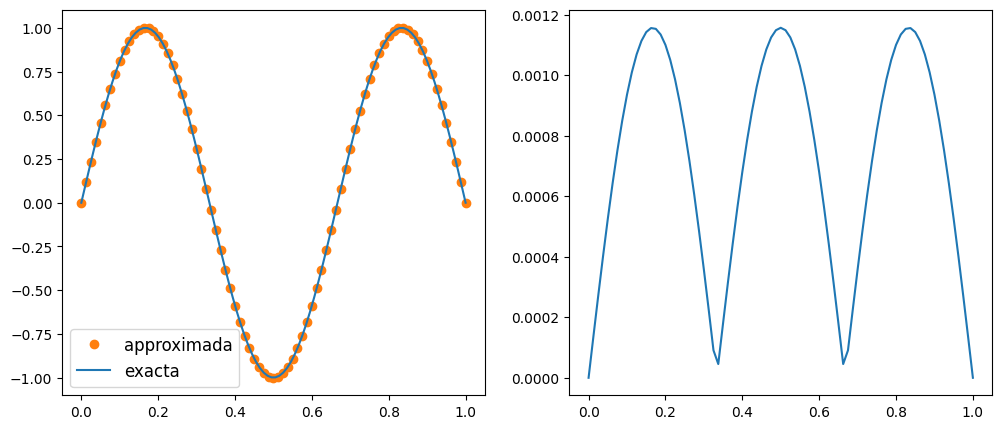

In [207]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(X, u,color='C01', marker='o', linestyle='None', label='approximada')
Xplot=np.linspace(0,1,100)
ax[0].plot(Xplot, ufun1D(Xplot), label='exacta')
ax[0].legend(loc="best", fontsize=12)

ax[1].plot(X, np.abs(ufun1D(X)-u), label='exacta')
plt.show()

## Por que debiese funcionar? 

Descomposicion de Schur de la matriz de diferencias finitas
\begin{equation}
(Q^{h})^\top A^{h} Q^{h} =\Lambda^{h} 
\end{equation}
donde 
\begin{equation}
Q^{h} = \left[q_{1},\ldots, q_{n}\right], \quad q_{j} = \sqrt{\frac{2}{n+1}}\begin{bmatrix} \sin(1\cdot\theta_j) \\ \vdots \\  \sin(n\cdot\theta_j)
\end{bmatrix},\quad
\theta_j = \frac{j\pi}{n+1}
\end{equation}
\begin{equation}
\Lambda_j^{h} = \begin{bmatrix}
\lambda_1^{h}& & 0 \\
& \ddots & \\
0& & \lambda_n^{h}
\end{bmatrix},\quad
\lambda_j^{h} = \frac{4}{h^2} \sin^{2}(\frac{j\pi}{2(n+1)}),
\quad j=1,...,n.
\end{equation}


In [208]:
n = X.size-2 # numero de nodos interiores
print("n=",n)
h = mesh.h
theta = lambda j: (j*np.pi)/(n+1)
lambdah_j = lambda j: (4.0/h**2)*(np.sin(theta(j)*0.5))**2
qh_j = lambda j: [np.sqrt(2.0/(n+1))*np.sin(i*theta(j)) for i in range(1,n+1)]
Q = np.asarray([qh_j(j) for j in range(1,n+1)])
D = np.diag([lambdah_j(j) for j in range(1,n+1)])

print("Comprobar factorizacion: ||Q \Lambda Q^T - A||=", np.linalg.norm(Q@(D@Q.T) - A1d))

n= 79
Comprobar factorizacion: ||Q \Lambda Q^T - A||= 1.6635238132329935e-09


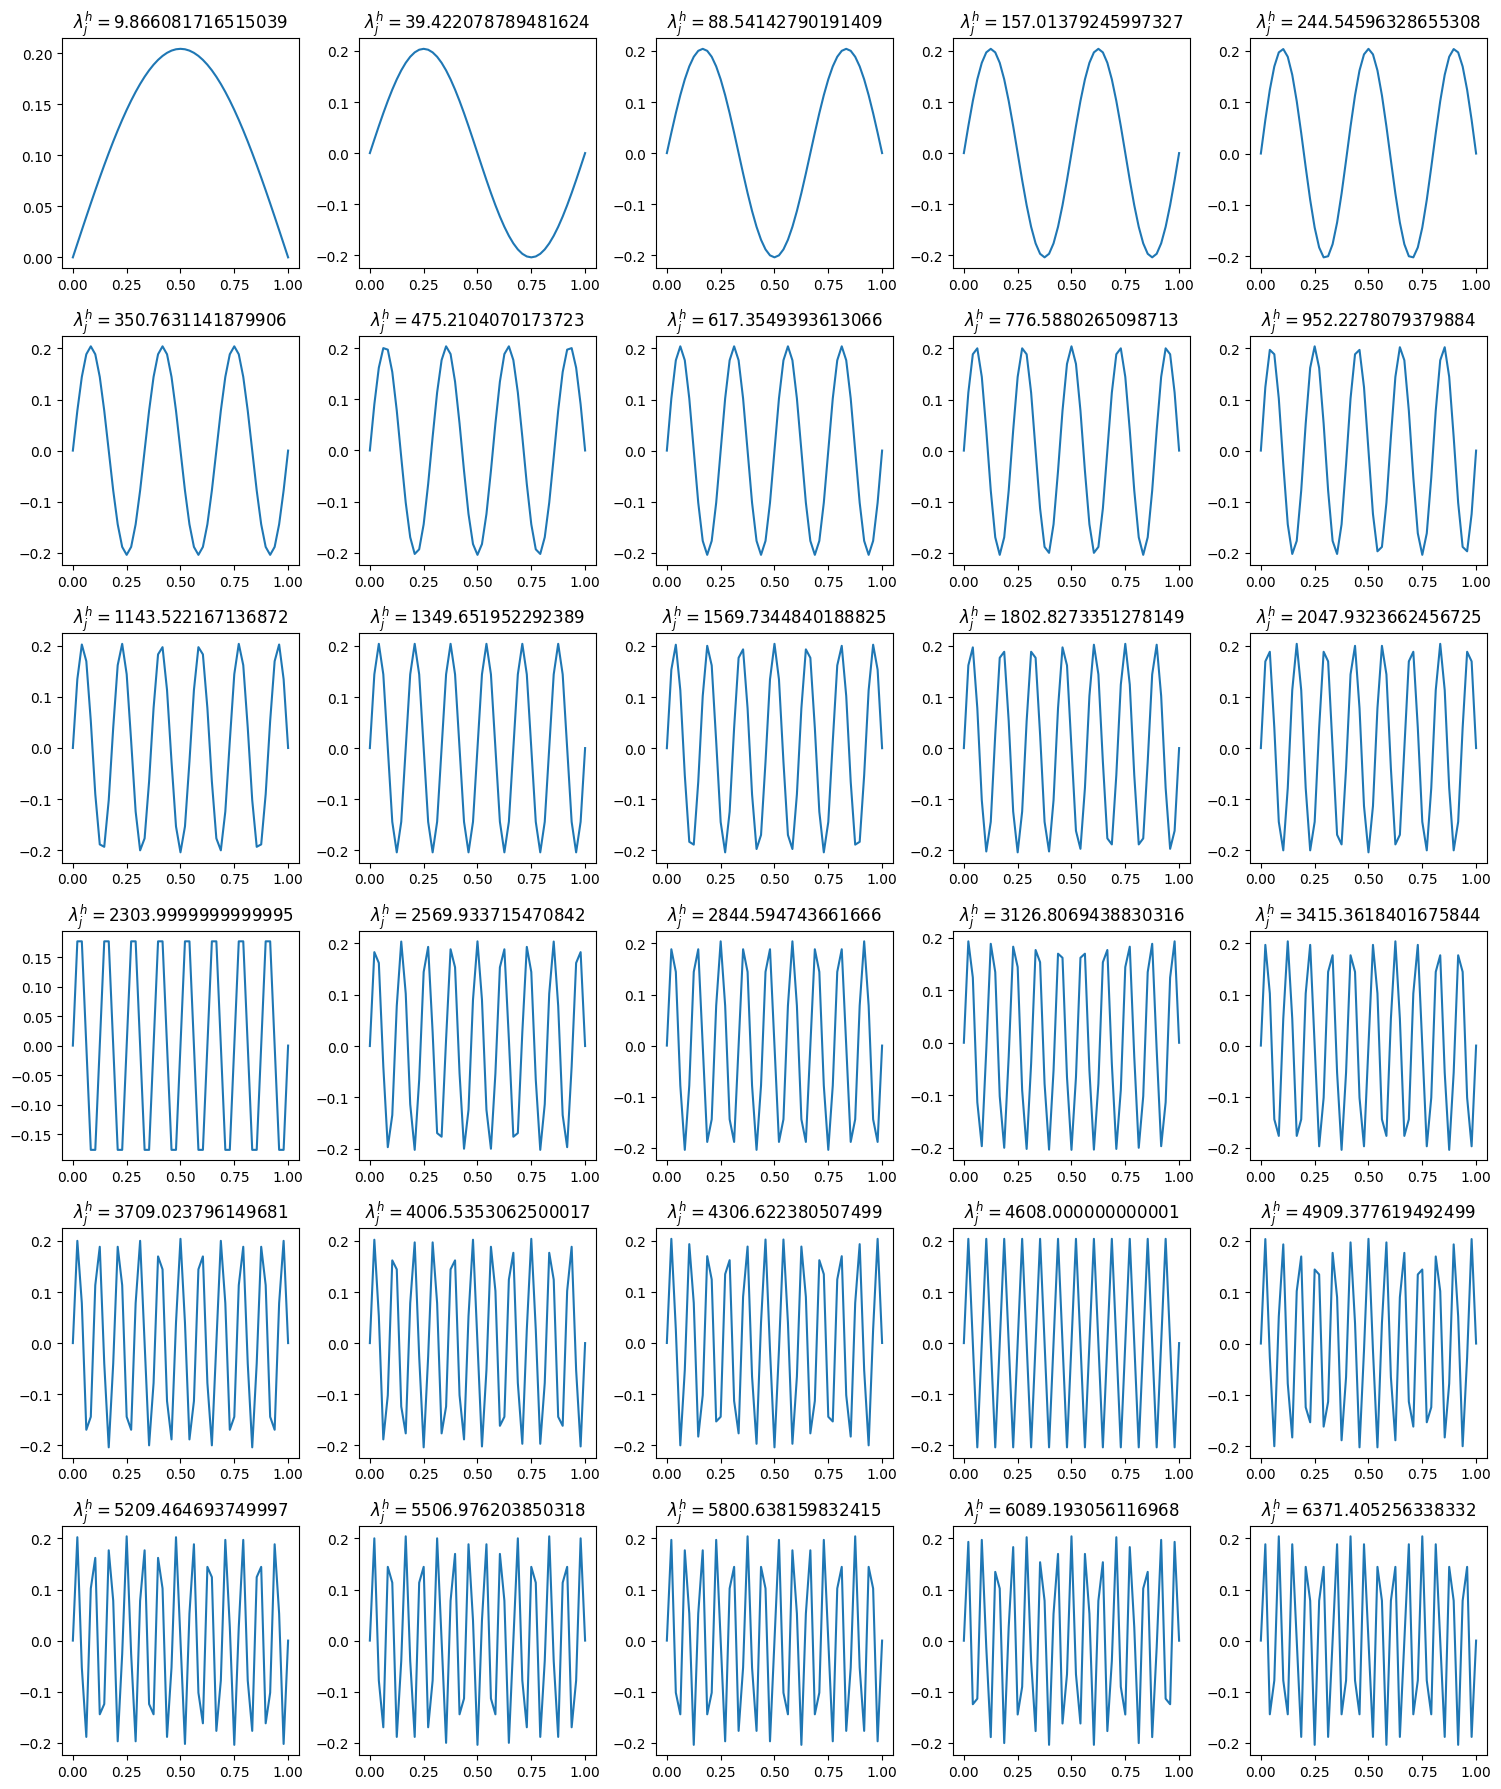

In [201]:


fig, axs = plt.subplots(6,5, figsize=(15,18))
for k, ax in enumerate(axs.reshape(-1)): 

    ax.plot(X, np.concatenate([[0],Q[:,k],[0]], axis=None))
    ax.set_title(r'$\lambda_j^{h} = $'+str(lambdah_j(k+1)))

plt.tight_layout()
plt.show()

In [ ]:
def weighted_jacobi(A, b, x0=None, omega=1.0, TOL=1e-10, MAXITER=1000, return_iterations=False):
    """
    Weighted Jacobi method for solving Ax = b.
    Input: A, b, omega
    Output: x
    """
    n = b.size
    if x0 is None:
        x = np.zeros(b.size)  
    else: 
        x = x0.copy()
    x_new = np.zeros(b.size)
    if return_iterations:
        X = []
        X.append(x0)
    
    # Descomposicion
    D = np.diag(A)
    R = A - np.diag(D)
    
    res = np.linalg.norm(A.dot(x)-b)
    k=0
    
    while k<MAXITER and res>TOL:
        x_new = (1.0 - omega) * x + omega * (b - R.dot(x)) / D
        if return_iterations:
            X.append(x_new)
        x = x_new.copy()
        k += 1
    if k ==MAXITER:
        info = "No convergió dentro del número máximo de iteraciones"
    else:
        info = "Convergió después de "+str(k)+" iteraciones"
    if return_iterations:
        return X, info
    else:
        return x, info

In [209]:
uwJ = np.zeros(X.size)
UUwJ, info = weighted_jacobi(A1d, b1d, x0=u[1:(X.size-1)]+0.1*np.random.randn(X.size-2), omega=2.0/3.0, MAXITER=10000, return_iterations=True)
print( info)

No convergió dentro del número máximo de iteraciones


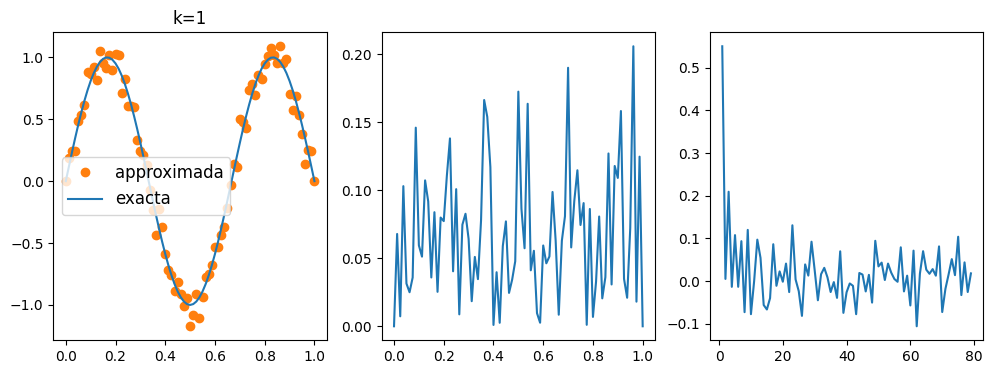

In [210]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

uwJ[1:X.size-1] = UUwJ[0]
error = np.abs(ufun1D(X)-uwJ)

freq_error = Q.dot(error[1:(n+1)])
ax[0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[0].plot(X, ufun1D(X), label='exacta')
ax[0].legend(loc="best", fontsize=12)
ax[0].set_title('k=1')
ax[1].plot(X, error , label='exacta')
ax[2].plot(np.arange(1,n+1), freq_error , label='exacta')

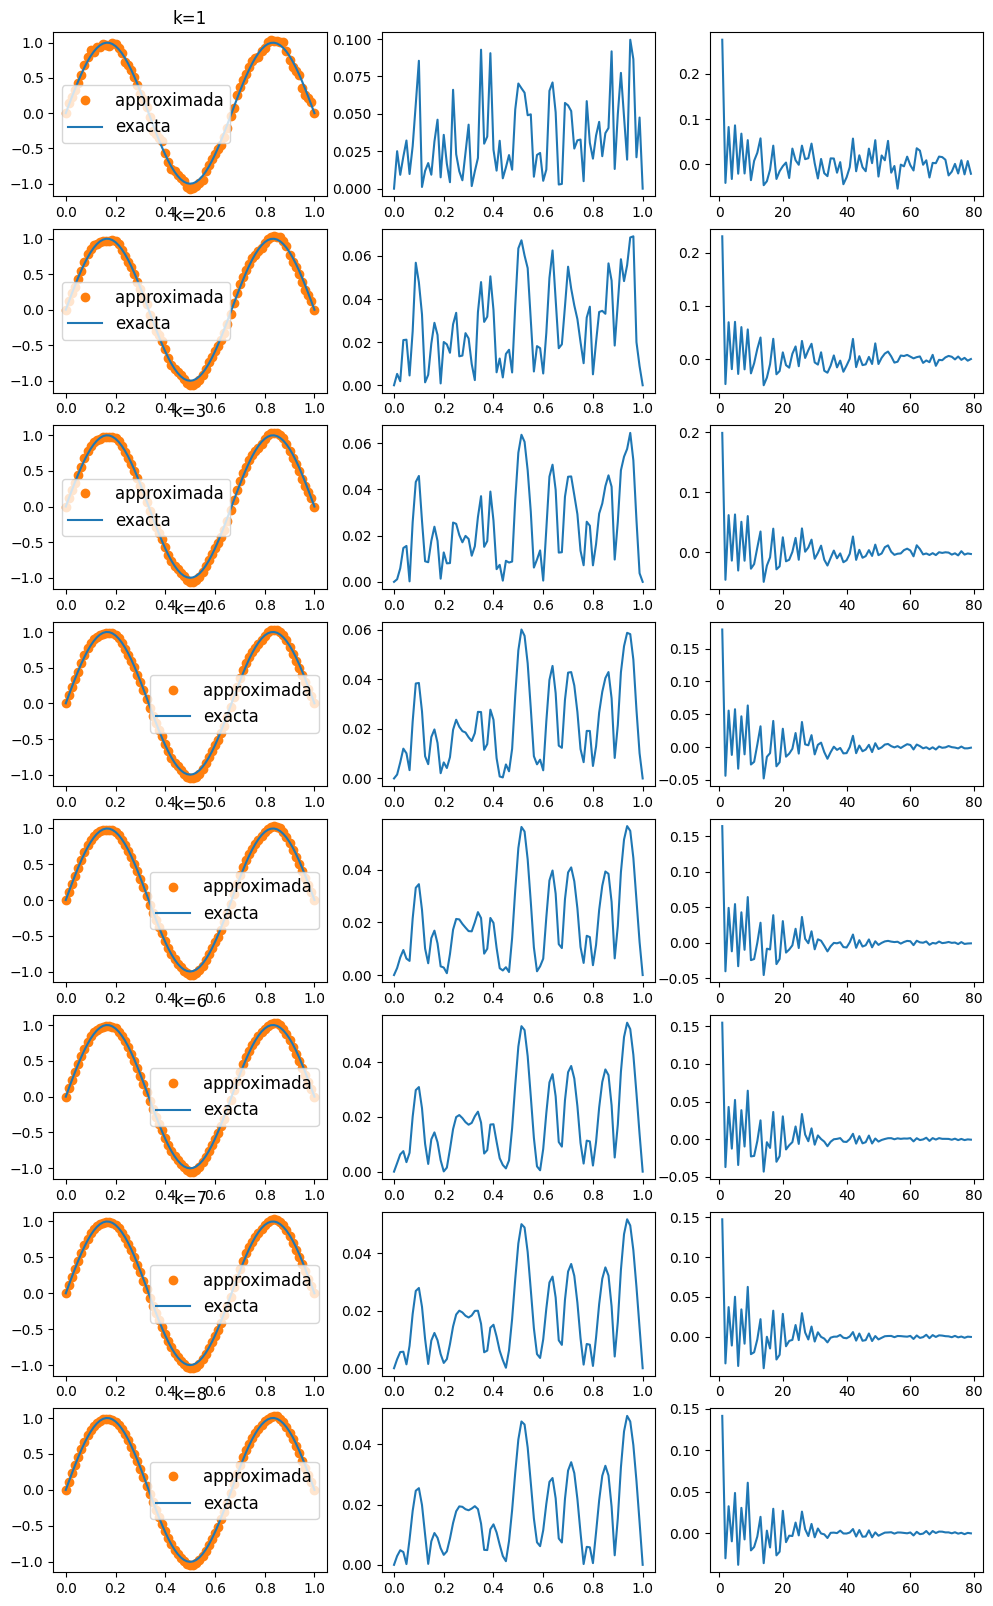

In [211]:
fig, ax = plt.subplots(8,3, figsize=(12,20))

uwJ[1:X.size-1] = UUwJ[1]
error = np.abs(ufun1D(X)-uwJ)

freq_error = Q.dot(error[1:(n+1)])
ax[0,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[0,0].plot(X, ufun1D(X), label='exacta')
ax[0,0].legend(loc="best", fontsize=12)
ax[0,0].set_title('k=1')
ax[0,1].plot(X, error , label='exacta')
ax[0,2].plot(np.arange(1,n+1), freq_error , label='exacta')

uwJ[1:X.size-1] = UUwJ[2]
error = np.abs(ufun1D(X)-uwJ)
ax[1,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[1,0].plot(X, ufun1D(X), label='exacta')
ax[1,0].legend(loc="best", fontsize=12)
ax[1,0].set_title('k=2')
freq_error = Q.dot(np.abs(ufun1D(X)-uwJ)[1:(n+1)])
ax[1,1].plot(X, error)
ax[1,2].plot(np.arange(1,n+1), freq_error )

uwJ[1:X.size-1] = UUwJ[3]
error = np.abs(ufun1D(X)-uwJ)
freq_error = Q.dot(error[1:(n+1)])
ax[2,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[2,0].plot(X, ufun1D(X), label='exacta')
ax[2,0].legend(loc="best", fontsize=12)
ax[2,0].set_title('k=3')
ax[2,1].plot(X, np.abs(ufun1D(X)-uwJ), label='exacta')
ax[2,2].plot(np.arange(1,n+1), freq_error )


uwJ[1:X.size-1] = UUwJ[4]
error = np.abs(ufun1D(X)-uwJ)
freq_error = Q.dot(error[1:(n+1)])
ax[3,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[3,0].plot(X, ufun1D(X), label='exacta')
ax[3,0].legend(loc="best", fontsize=12)
ax[3,0].set_title('k=4')
ax[3,1].plot(X, np.abs(ufun1D(X)-uwJ), label='exacta')
ax[3,2].plot(np.arange(1,n+1), freq_error )


uwJ[1:X.size-1] = UUwJ[5]
error = np.abs(ufun1D(X)-uwJ)
freq_error = Q.dot(error[1:(n+1)])
ax[4,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[4,0].plot(X, ufun1D(X), label='exacta')
ax[4,0].legend(loc="best", fontsize=12)
ax[4,0].set_title('k=5')
ax[4,1].plot(X, np.abs(ufun1D(X)-uwJ), label='exacta')
ax[4,2].plot(np.arange(1,n+1), freq_error )

uwJ[1:X.size-1] = UUwJ[6]
error = np.abs(ufun1D(X)-uwJ)
freq_error = Q.dot(error[1:(n+1)])
ax[5,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[5,0].plot(X, ufun1D(X), label='exacta')
ax[5,0].legend(loc="best", fontsize=12)
ax[5,0].set_title('k=6')
ax[5,1].plot(X, np.abs(ufun1D(X)-uwJ), label='exacta')
ax[5,2].plot(np.arange(1,n+1), freq_error )


uwJ[1:X.size-1] = UUwJ[7]
error = np.abs(ufun1D(X)-uwJ)
freq_error = Q.dot(error[1:(n+1)])
ax[6,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[6,0].plot(X, ufun1D(X), label='exacta')
ax[6,0].legend(loc="best", fontsize=12)
ax[6,0].set_title('k=7')
ax[6,1].plot(X, np.abs(ufun1D(X)-uwJ), label='exacta')
ax[6,2].plot(np.arange(1,n+1), freq_error )


uwJ[1:X.size-1] = UUwJ[8]
error = np.abs(ufun1D(X)-uwJ)
freq_error = Q.dot(error[1:(n+1)])
ax[7,0].plot(X, uwJ,color='C01', marker='o', linestyle='None', label='approximada')
ax[7,0].plot(X, ufun1D(X), label='exacta')
ax[7,0].legend(loc="best", fontsize=12)
ax[7,0].set_title('k=8')
ax[7,1].plot(X, np.abs(ufun1D(X)-uwJ), label='exacta')
ax[7,2].plot(np.arange(1,n+1), freq_error )
plt.show()

In [232]:
def twogrid(Ah, b, u0 = None, pre_smoothing_steps=3, post_smoothing_steps=3):
    n = b.size
    if u0 is None:
        u0 = np.random.randn(n)
    # Pre smooth
    up1, info = weighted_jacobi(Ah, b, x0=u0, omega=2.0/3.0, MAXITER=3)
    # Residual malla fina
    rh = b-Ah.dot(up1)
    # Restriccion
    r2h = Restriccion(rh)
    # Correccion malla gruesa
#     A2h = diff1dPoissonmatrix(a=0, b=1, n=int((n+1)/2))
    print(r2h.size,A2h.shape)
    z2h = np.linalg.solve(A2h,r2h)
    # Prolongacion correccion
    zh = Prolongacion(z2h)
    # Actualizacion
    uplus = up1 + zh
    # Post smooth
    uh, info = weighted_jacobi(Ah, b1d, x0=uplus, omega=2.0/3.0, MAXITER=3)
    return uh

In [233]:
def Restriccion(r):
    n = r.size
    m = int((n+1)/2-1)
    Rmat = np.zeros((m,n))
    for i in range(m):
        Rmat[i,2*i] = 1.0/4.0
        Rmat[i,2*i+1] = 2.0/4.0
        Rmat[i,2*i+2] = 1.0/4.0
    rc = Rmat.dot(r)
    return rc

def Prolongacion(zc):
    m = zc.size
    n = int((m+1)*2-1)
    print(n,m)
    Pmat = np.zeros((n,m))
    for i in range(m):
        Pmat[2*i,i] = 1.0/2.0
        Pmat[2*i+1,i] = 2.0/2.0
        Pmat[2*i+2,i] = 1.0/2.0
    z = Pmat.dot(zc)
    return z

39 (39, 39)
79 39


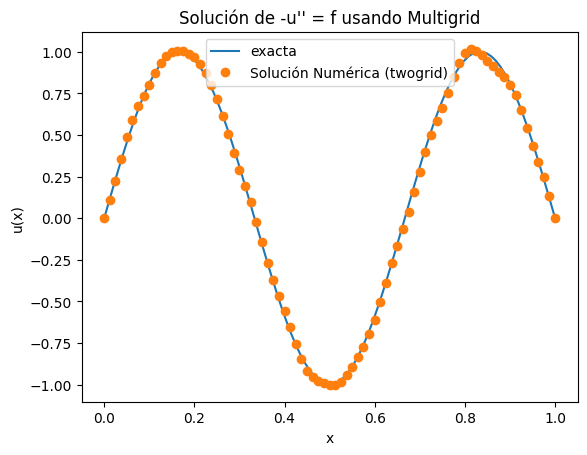

In [234]:

# Parámetros del problema
u2g = np.zeros(X.size)
u2g[1:(X.size-1)] = twogrid(A1d, b1d)


# Gráfica de la solución numérica vs exacta
Xplot=np.linspace(0,1,100)
plt.plot(Xplot, ufun1D(Xplot), label='exacta')
plt.plot(X, u2g,'o', label='Solución Numérica (twogrid)')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solución de -u\'\' = f usando Multigrid')
plt.show()


39 (39, 39)
79 39


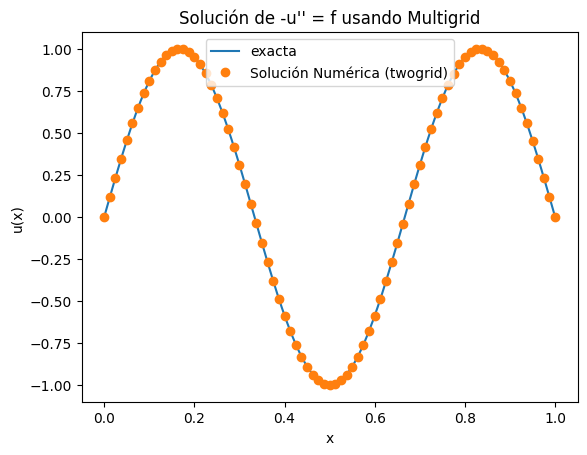

In [235]:
u2g[1:(X.size-1)] = twogrid(A1d, b1d, u0 =u2g[1:(X.size-1)] )


# Gráfica de la solución numérica vs exacta
Xplot=np.linspace(0,1,100)
plt.plot(Xplot, ufun1D(Xplot), label='exacta')
plt.plot(X, u2g,'o', label='Solución Numérica (twogrid)')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.title('Solución de -u\'\' = f usando Multigrid')
plt.show()